In [16]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import statistics

import seaborn as sns

import scipy.stats

In [24]:
data = pd.read_csv('C:\\Users\\ADMIN\\Downloads\\delivery_time.csv')

In [25]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [26]:
data.head() #observing first 5 entries in data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [27]:
data.tail() #observing last 5 entires in data

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [30]:
np.shape(data) #no of entries and no of columns

(21, 2)

In [32]:
data.dtypes
# data types in data sets

Delivery Time    float64
Sorting Time       int64
dtype: object

In [34]:
data.info() # no of null statements in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [36]:
data.describe() #total analysis of data in dataset

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [37]:
data.value_counts() #every entry is unique

Delivery Time  Sorting Time
8.00           2               1
17.90          10              1
24.00          9               1
21.50          5               1
21.00          10              1
19.83          8               1
19.75          6               1
19.00          7               1
18.75          9               1
18.11          7               1
17.83          7               1
9.50           3               1
16.68          7               1
15.35          6               1
14.88          4               1
13.75          6               1
13.50          4               1
12.03          3               1
11.50          3               1
10.75          4               1
29.00          10              1
dtype: int64

In [38]:
#Analyising if thereare any outliers

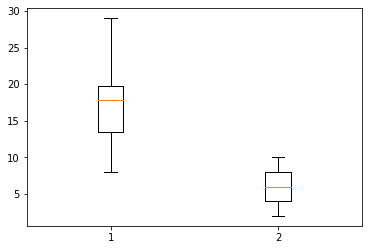

In [46]:
plt.boxplot(data)
plt.show()

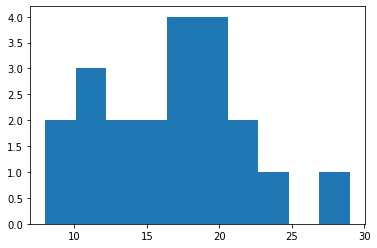

In [45]:
plt.hist(data['Delivery Time'])
plt.show()

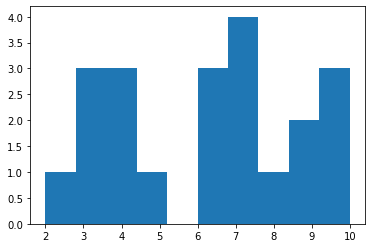

In [47]:
plt.hist(data['Sorting Time'])
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

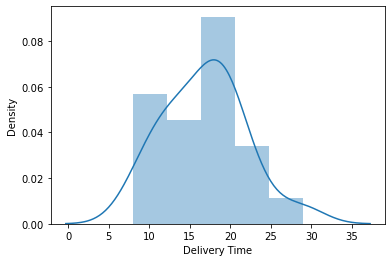

In [60]:
sns.distplot(data['Delivery Time'])
# distplot for delivery time

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

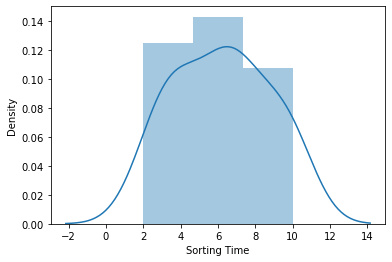

In [61]:
sns.distplot(data['Sorting Time'])
# distplot for sorting time

In [53]:
data.skew() # skewness is not equal to 0 so dataset is not in normal distribution 

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [54]:
data.kurtosis()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

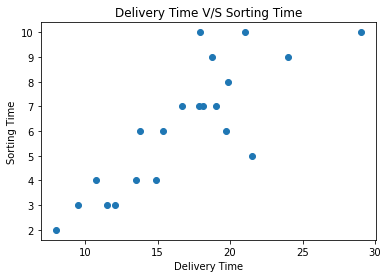

In [56]:
#if the variables in the data are collinear or not

plt.scatter(data['Delivery Time'],data['Sorting Time'])
plt.title('Delivery Time V/S Sorting Time')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

In [62]:
# checking the correlation between both the variables

data.corr()

#high correlation >0.85

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [65]:
#scatter plot between the variables and also the histogram

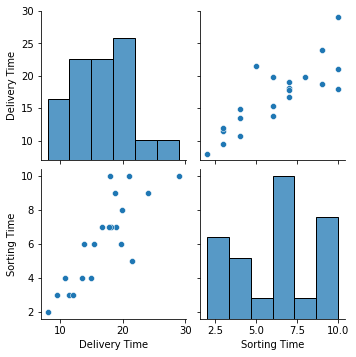

In [67]:
sns.pairplot(data)

In [75]:
data.rename(columns = {'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},inplace = True)
data.columns

Index(['DeliveryTime', 'SortingTime'], dtype='object')

In [76]:
import statsmodels.formula.api as smf
model1 = smf.ols('DeliveryTime ~ SortingTime', data=data).fit()
model1
# we just created a first model

In [77]:
model1.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [78]:
# now we are going get the t-values and p-values
print('t-values''\n',model1.tvalues , '\n' , 'p-values''\n',model1.pvalues)

t-values
 Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 p-values
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [79]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        15:58:01   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='DeliveryTime', ylabel='SortingTime'>

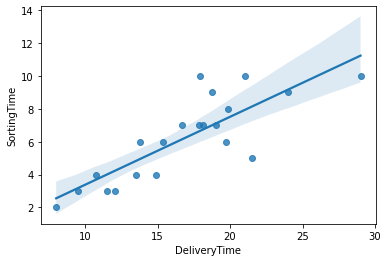

In [80]:
sns.regplot(x="DeliveryTime", y="SortingTime", data=data)

In [81]:
#model2
data['SortingTimeSQ']=data['SortingTime']**2
data['SortingTimeSQ']
# the input variable is squared 

0     100
1      16
2      36
3      81
4     100
5      36
6      49
7       9
8     100
9      81
10     64
11     16
12     49
13      9
14      9
15     16
16     36
17     49
18      4
19     49
20     25
Name: SortingTimeSQ, dtype: int64

In [82]:
model2 = smf.ols('DeliveryTime ~ SortingTimeSQ', data=data).fit()
model2

In [84]:
# now we are going get the t-values and p-values
print('t-values''\n',model2.tvalues , '\n' , 'p-values''\n',model2.pvalues)

t-values
 Intercept        9.398601
SortingTimeSQ    5.691330
dtype: float64 
 p-values
 Intercept        1.415704e-08
SortingTimeSQ    1.739194e-05
dtype: float64


In [86]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           1.74e-05
Time:                        16:05:34   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2372      1.196      9.399      0.000       8.735      13.740
SortingTimeSQ     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='DeliveryTime', ylabel='SortingTimeSQ'>

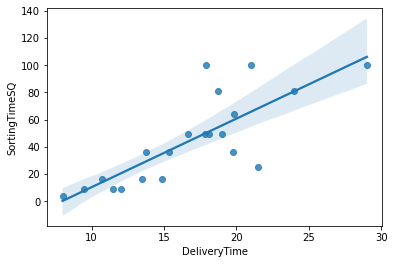

In [87]:
sns.regplot(x="DeliveryTime", y="SortingTimeSQ", data=data)